<a href="https://colab.research.google.com/github/origin1508/pytorch-cheatsheet/blob/main/Pytorch_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코랩 단축키
|단축키|명령|
|---|---|
|Ctrl + M H|단축키 보기|
|Ctrl + Enter|초점이 맞춰진 셀 실행|
|Shift + Enter|셀 실행후 다음셀로|
|Alt + Enter|셀 실행후 새 셀 생성|
|Ctrl + M .|런타임 다시 시작|
|Ctrl + M B|아래에 코드 셀 삽입|
|Ctrl + M A|위에 코드 셀 삽입|
|Ctrl + M D|셀 지우기|
|Ctrl + M Y|코드 셀로 변경|
|Ctrl + M M|마크다운 셀로 변경|


## 사전설정
* `%matplotlib` : 현재 노트북에 plotting을 하게 해주는 magic command
* inline : 노트북 내부에 출력하도록 설정

> **magic command**는 IPython 인터프리터에 추가된 특수 명령어. 명령어 앞에 `%`기호를 붙여 사용한다.

In [ ]:
%matplotlib inline

### 구글 드라이브 mount
* %cd : 디렉토리 이동
* %ls : 현재 디렉토리의 내용을 확인

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/
%ls

/content/drive/MyDrive/Colab Notebooks
'one-hot encoding.ipynb'    '파일입출력_2.ipynb의 사본'
'Pytorch cheatsheet.ipynb'


## 코랩을 써야하는 이유
torch.cuda.is_available()    
그래픽 카드를 써야하기 때문이다. GPU를 사용하면 병렬 연산이 가능하기 때문이다.

런타임 유형변경에서 하드웨어 가속기를 gpu로 변경할 수 있다.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch.ones([2, 4], dtype=torch.float64, device=device)

x = torch.tensor([[1., -1.], [1., -1.]])
x.to(device)
# x.to(device, dtype=torch.float64) 데이터 타입을 지정가능

cpu


tensor([[ 1., -1.],
        [ 1., -1.]])

In [ ]:
### shape, dtype, device
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
print(f"Number of dimension: {tensor.ndim}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Number of dimension: 2


## Pytorch
행렬을 고차원으로 빠르고 편리하게 쓸 수 있게 도구를 넣어둔 라이브러리

In [ ]:
import numpy as np
import torch

In [ ]:
print(torch.__version__)

2.0.1+cu118


### 영행렬
0으로 채워진 행렬 만들기

파이토치의 기본 데이터 타입은 32비트 부동소수점

In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


### 1로 채운 행렬
ones는 1로 가득찬 행렬은 만듬

dtype 기본은 torch.float32

In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


### 랜덤과 시드
random과 관련된 함수들
* rand(n, m) : 0과 1사이의 숫자 (n x m) 사이즈 행렬
* randn(n, m) : 평균이 0이고 std가 1인 (n x m) 사이즈 행렬
* randint(low=n, high=m, size=(x, y)) : low부터 hign(미포함)까지 무작위 정수 행렬
* randperm(n) : 0부터 n까지(n 미포함) 정수로 이루어진 랜덤 순열

random seed

`manual_seed(random_seed)`    
random seed 값을 고정해서 동일한 세트의 난수를 생성하게 한다.

In [ ]:
print(torch.rand(2, 2))
print(torch.randn(2, 2))
print(torch.randint(low=0, high=10, size=(2, 4)))
print(torch.randperm(10))

tensor([[0.6276, 0.7357],
        [0.0381, 0.2138]])
tensor([[-0.2749,  0.6204],
        [-1.9215, -0.9559]])
tensor([[4, 4, 3, 5],
        [2, 1, 3, 5]])
tensor([4, 3, 5, 6, 7, 2, 0, 1, 8, 9])


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2) # r1 = torch.rand(size=(2, 2))
print("랜덤 tensor 값 :")
print(r1)

r2 = torch.rand(2, 2)
print("\n다른 랜덤 tensor값 :")
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print("\nr1과 일치 :")
print(r3)

랜덤 tensor 값 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor값 :
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치 :
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


### Reproducibility
https://pytorch.org/docs/stable/notes/randomness.html    
랜덤 시드를 고정하는 것은 매우 중요하다. 실험 재현을 위한 것으로 많은 부분에서 문제를 일으켰던 부분이다.

In [ ]:
import random

random_seed = 1729

# Pytorch의 random_seed 고정
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-gpu

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Numpy의 random_seed 고정
np.random.seed(random_seed)

# Python의 random_seed 고정
random.seed(random_seed)

### 다양한 기능

In [ ]:
# 빈 텐서
print(torch.empty(4))
print(torch.empty(4).size)
print(torch.empty((4, 5)))
print(torch.empty((4, 5)).size)

# 주어진 값으로 채워진 텐서
print(torch.full((1, 2) , 3.14))

# 단위 행렬
print(torch.eye(3))
print(torch.eye(5, 3))

tensor([-5.4121e-25,  3.3415e-41, -1.5749e-24,  3.3415e-41])
<built-in method size of Tensor object at 0x7a9cc7875b70>
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])
<built-in method size of Tensor object at 0x7a9cc7875b70>
tensor([[3.1400, 3.1400]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])


### 리스트로 행렬만들기
리스트의 데이터 타입을 따라간다.

In [ ]:
z = torch.tensor([[1., -1.], [1., -1.]])
print(z)
print(z.dtype)
print(z.size())

x = torch.tensor([[1, -1], [1, -1]])
print(x)
print(x.dtype)

tensor([[ 1., -1.],
        [ 1., -1.]])
torch.float32
torch.Size([2, 2])
tensor([[ 1, -1],
        [ 1, -1]])
torch.int64


### ndarray로 행렬만들기

In [ ]:
np_array = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.tensor(np_array)
print(x)

# 인덱싱
print(x[1][2])

x[0][1] = 8
print(x)

# 슬라이싱
b = x[:, 0:2]
print(b)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor(6)
tensor([[1, 8, 3],
        [4, 5, 6]])
tensor([[1, 8],
        [4, 5]])


### torch.eq | torch.equal | torch.allclse
* torch.eq : elementwise eq
* torch.equal : 두 텐선의 사이즈와 값이 같으면 True, 아니면 False
* torch.allclose : 정밀도 이내에서 같은 것으로 봄 (부동 소수점)
* torch.ne = torch.not_equal
* torch.le = torch.less_equal
* torch.ge = torch.greater_equal

`torch.allclose(input, other, rtol=1e-05, atol=1e-08, equal_nan=False)`
컴퓨터는 부동소수점에 오차가 있다.

In [ ]:
a = torch.tensor([[2, 5], [4, 3]])
b = torch.tensor([[2, 8], [2, 3]])

print(torch.eq(a, b))
print(torch.equal(a, b))
print(torch.all(torch.eq(a, b)))

tensor([[ True, False],
        [False,  True]])
False
tensor(False)


In [ ]:
print(torch.allclose(torch.tensor([10000., 1e-07]), torch.tensor([10000.1, 1e-08])))
print(torch.allclose(torch.tensor([10000., 1e-08]), torch.tensor([10000.1, 1e-09])))


False
True


### walus 연산자
:=


In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(y:=x[1][2].item())
print(type(y))

# walus 연산자를 안쓰면
y = x[1][2].item()
print(y)
print(type(y))

6
<class 'int'>
6
<class 'int'>


### copy tensor
* clone : 메모리를 새롭게 할당, 계산 그래프에 계속 상주 -> 연결은 끊어지지 않았다.
* detach : 메모리를 공유, 계산 그래프에서 뺌 단 storag를 공유하게 detach로 생성한 Tensor가 변경되면 원본 Tensor도 똑같이 변한다.

torch.tensor를 copy하는 방법 중 옳은 것은? https://seducinghyeok.tistory.com/10    
https://hongl.tistory.com/363

In [ ]:
x = torch.rand(size=(3, 3))
print(x)

y = x.clone().detach()
print(torch.equal(x, y))

y = x.detach().clone() # 이것이 좀더 효율적 조금 더 빠름 계산 그래프를 먼저 빼느냐 나중에 빼느냐에 따라 옮기는 양이 다르다.
print(torch.equal(x, y))

tensor([[0.9927, 0.4128, 0.5938],
        [0.6128, 0.1519, 0.0453],
        [0.5035, 0.9978, 0.3884]])
True
True


#### 성능 측정 방법
`!pip install perfplot`

In [ ]:
!pip install perfplot

Output()

<ipython-input-74-9042c1793786>:6: UserWarning: To copy construct from a tensor, it is recommended to use 
sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than 
tensor.new_tensor(sourceTensor).
  lambda a: a.new_tensor(a),

<ipython-input-74-9042c1793786>:9: UserWarning: To copy construct from a tensor, it is recommended to use 
sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than 
torch.tensor(sourceTensor).
  lambda a: torch.tensor(a),

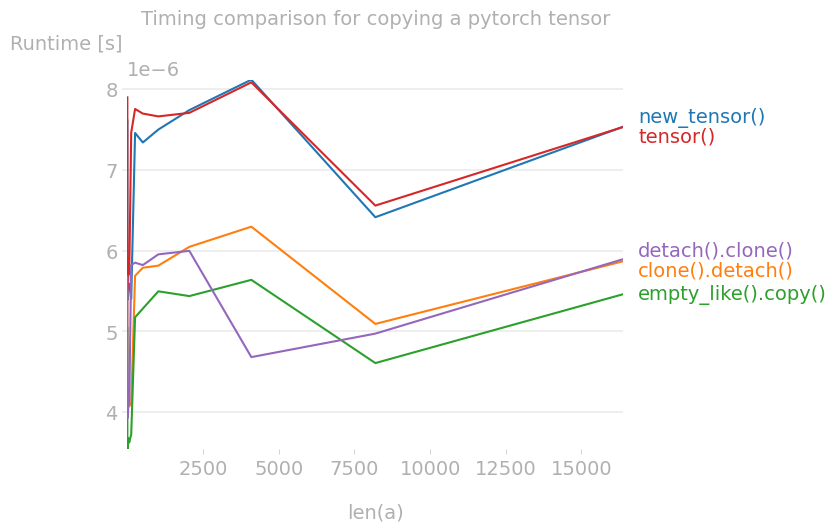

In [ ]:
import perfplot

perfplot.show(
    setup=lambda n: torch.randn(n),
    kernels=[
        lambda a: a.new_tensor(a),
        lambda a: a.clone().detach(),
        lambda a: torch.empty_like(a).copy_(a),
        lambda a: torch.tensor(a),
        lambda a: a.detach().clone(),
    ],
    labels = ["new_tensor()", "clone().detach()", "empty_like().copy()", "tensor()", "detach().clone()"],
    n_range = [2 ** k for k in range(15)],
    xlabel="len(a)",
    logx=False,
    logy=False,
    title="Timing comparison for copying a pytorch tensor"
)

## 유용한 tensor 기능들

In [ ]:
original_tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)

# new()를 사용하여 기존 tensor와 동일한 속성을 가진 새로운 tensor 생성
print(original_tensor.new(2, 2))
print(original_tensor.new_zeros(2, 2))
print(original_tensor.new_ones(2, 2))
print(original_tensor.new_full((2, 2), fill_value=7.0))

# tensor.new_tensor(x) is equivalent to x.clone().detach()

tensor([[-4.5997e-05,  4.3985e-41],
        [-1.1506e-21,  3.3415e-41]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[7., 7.],
        [7., 7.]])
